In [3]:
using PlotlyJS, Primes

run_examples = true

true

Inspired by (I didn't understand most of it):
* [Prime Based Error and Complexity Measures (Graham Breed)](https://x31eq.com/temper/primerr.pdf)
* [Tenney-Euclidean temperament measures](https://en.xen.wiki/w/Tenney-Euclidean_temperament_measures)

# Scale Error (SE)

Scale has notes $\mathscr{N}=\{N_1, N_2, ..., N_n\}$ in $C = [0; 1200)$ cents range.

We have a set of prime numbers $P = \{p_i\} = {3, 5, 7, 11, ...}$.  

Every frequency ratio can be represented as $\displaystyle \cfrac{n}{d} = \prod_{i}{p_i^{x_i}}, x_i \in \mathbb{Z}$.  

The size of an interval (in cents):
$$ s(x=\cfrac{n}{d}) = \sum_i{x_ih_i}, \quad h_i = 1200log_2{p_i}$$  

In our scale every $h_i$ has approximation $t_i$ from notes $\mathscr{N}$ (and their transpositions by octaves).  

So the error of approximation of ratios follows from the approximation error of $t_i$.  
Approximation error of $t_i$:  
$$ e_i = \left|\cfrac{t_i}{b_i} - \cfrac{h_i}{b_i}\right| $$
where $b_i$ is a weight factor, we can use $b_i = h_i$:
$$ e_i = \left|\cfrac{t_i}{h_i} - 1\right| $$ 

Scale error (SE) is RMS (Root mean square) of errors $e_i$:
$$ e = \sqrt{\cfrac{1}{n}\sum_i{e_i^2}} $$

In [52]:
function primeError(notes::Vector{Float64}, p::Int)
    # Calculate $ e_i $
    h = 1200*log2(p)
    n = notes[argmin(abs.(h % 1200 .- notes))]
    t = floor(h / 1200)*1200 + n
    return abs(t/h - 1)
end


function scaleError(notes::Vector{Float64}, ps::Vector{Int})
    # Calculate $ e $
    numPs = length(ps)
    # We need this to calculate primeError properly, because cents 
    #    range C is periodical with period 1200
    notes = vcat(notes, notes.+1200) 
    return sqrt(sum([primeError(notes, ps[i]) for i in 1:numPs].^2)/numPs)
end

scaleError (generic function with 1 method)

### SE Example

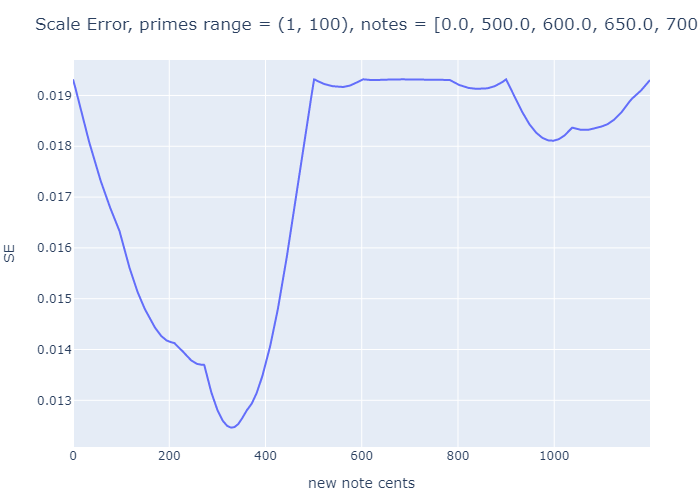

In [55]:
notes = [0., 500., 600., 650., 700., 900.]
primesRange = (1, 100)
ps = primes(primesRange[1], primesRange[2])

if run_examples
    notes = [0., 500., 600., 650., 700., 900.]
    primesRange = (1, 100)
    ps = primes(primesRange[1], primesRange[2])

    newNoteCents = range(start=0, stop=1200, length=1201)[1:end-1]
    SEs = zeros(length(newNoteCents))

    for i in range(1, length(newNoteCents))
        SEs[i] = scaleError(vcat(notes, newNoteCents[i]), ps)
    end

    p = plot(newNoteCents, SEs, Layout(
        title = "Scale Error, primes range = $primesRange, notes = $notes",
        xaxis_title = "new note cents",
        yaxis_title = "SE"
    ))
    display(p)
end